In [6]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [9]:
import os
current_directory = os.getcwd()
print(current_directory)
csv_file_path = os.path.join(current_directory, 'data', 'Alipur.csv')

C:\Users\Nishtha\Documents\data


In [11]:
df = pd.read_csv('Alipur.csv')

In [12]:
df.rename(columns = {'From Date':'Date'}, inplace = True)

In [13]:
df['Date'] = pd.to_datetime(df.Date)

In [14]:
df.set_index('Date', inplace = True)

In [15]:
df.head()

,PM25,PM10,RH,Temp
Date,,,,
2019-01-01 00:00:00,361.5,525.5,95.05,9.0
2019-01-01 01:00:00,348.0,514.0,96.48,9.0
2019-01-01 02:00:00,298.0,466.5,97.65,9.0
2019-01-01 03:00:00,276.5,429.5,98.20,7.0
2019-01-01 04:00:00,295.0,435.5,98.65,7.0


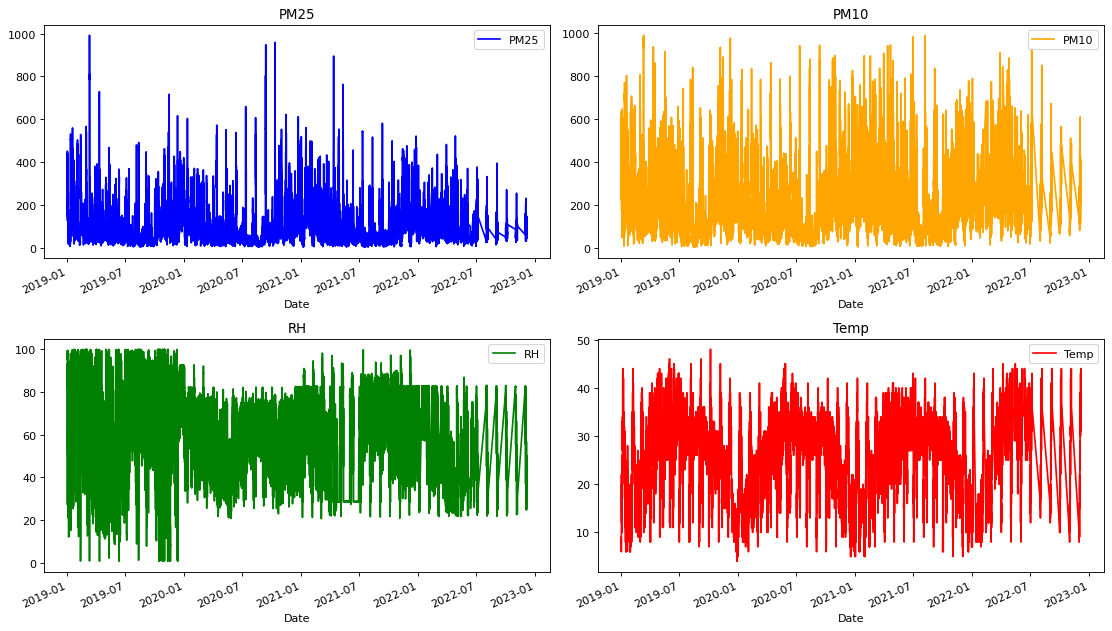

In [16]:

color_list = [
    "blue",
    "orange",
    "green",
    "red",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

<Axes: xlabel='Date'>

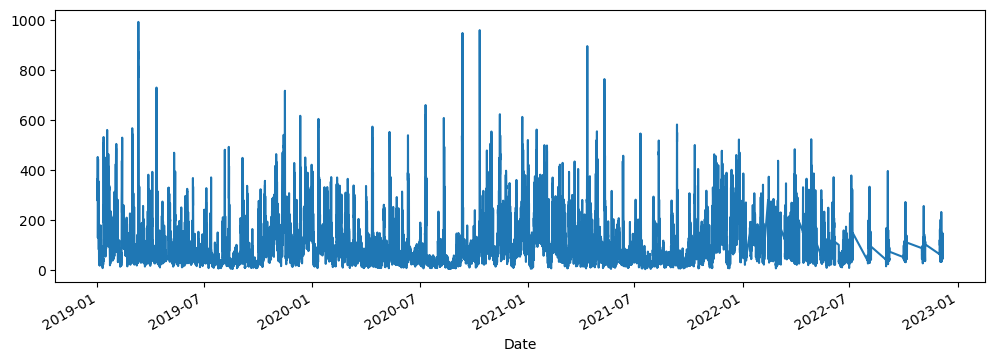

In [17]:
df['PM25'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

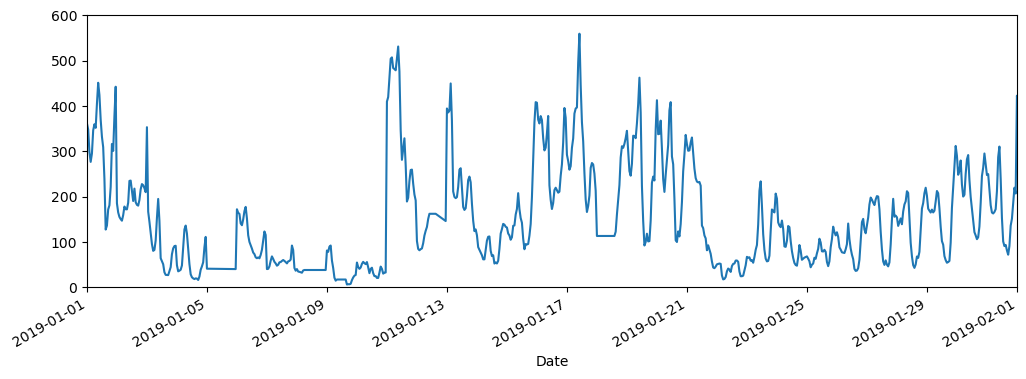

In [18]:
## xlimit and y limit
df['PM25'].plot(xlim=['01-01-19 0:00','02-01-19 0:00'],ylim=[0,600],figsize=(12,4))

<Axes: xlabel='Date'>

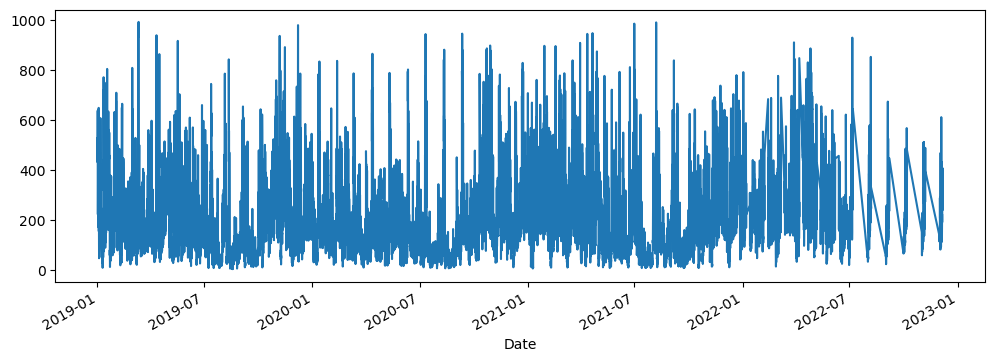

In [19]:
df['PM10'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

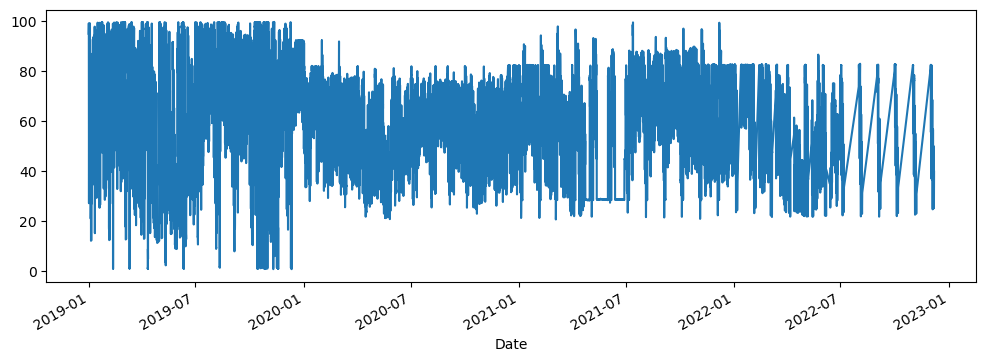

In [20]:
df['RH'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

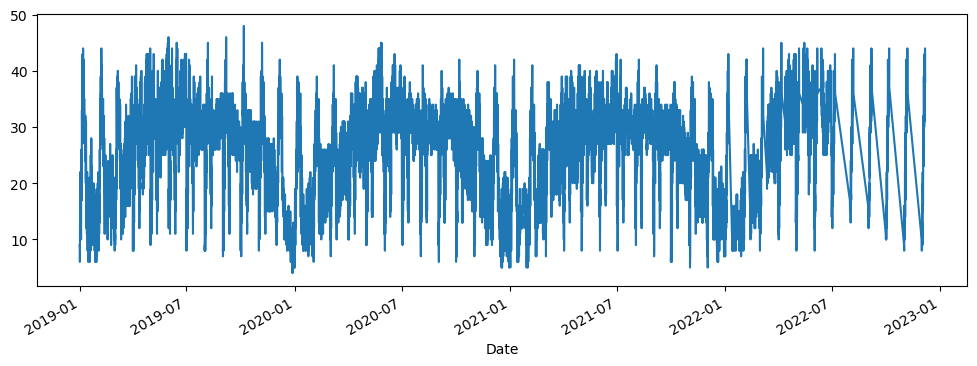

In [21]:
df['Temp'].plot(figsize = (12,4))

In [22]:
df_PM25 = df['PM25']

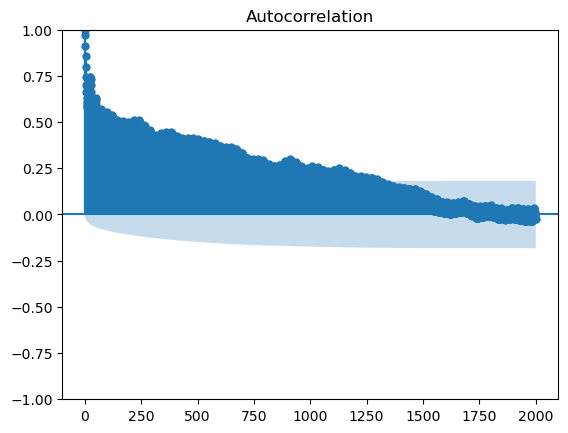

In [23]:
acf_plot = plot_acf(df_PM25, lags =2000)

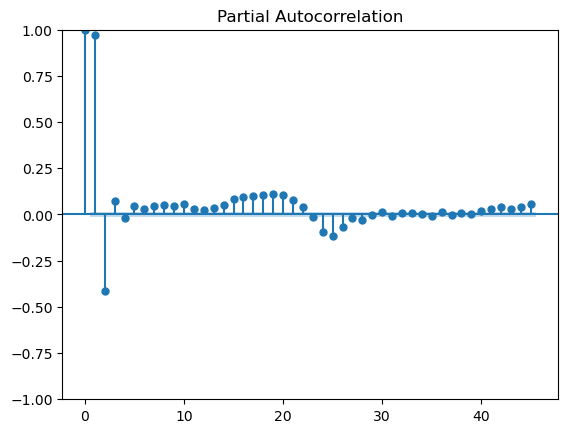

In [24]:
pacg_plot = plot_pacf(df_PM25)

In [25]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

PM25 - Series is Stationary
PM10 - Series is Stationary
RH - Series is Stationary
Temp - Series is Stationary


In [26]:
ad_fuller_result_1 = adfuller(df['PM25'])
print('PM25')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

PM25
ADF Statistic: -9.970371635348837
p-value: 2.248744926367116e-17

---------------------



In [27]:
ad_fuller_result_2 = adfuller(df['PM10'])
print('PM10')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

PM10
ADF Statistic: -9.970371635348837
p-value: 2.248744926367116e-17

---------------------



In [28]:
ad_fuller_result_3 = adfuller(df['RH'])
print('RH')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

RH
ADF Statistic: -9.970371635348837
p-value: 2.248744926367116e-17

---------------------



In [29]:
ad_fuller_result_4 = adfuller(df['Temp'])
print('Temp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

Temp
ADF Statistic: -9.970371635348837
p-value: 2.248744926367116e-17

---------------------



In [30]:
max_lags=8
y='PM25'
     

for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - PM10 : P_Values - [0.0, 0.0339, 0.0051, 0.0219, 0.0109, 0.0098, 0.0031, 0.0]
Column - RH : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Temp : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [31]:
print('PM25 causes PM10?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['PM10', 'PM25']], 4)

print('\PM10 causes PM25?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['PM25', 'PM10']], 4)

PM25 causes PM10?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=49.6559 , p=0.0000  , df_denom=30644, df_num=1
ssr based chi2 test:   chi2=49.6607 , p=0.0000  , df=1
likelihood ratio test: chi2=49.6206 , p=0.0000  , df=1
parameter F test:         F=49.6559 , p=0.0000  , df_denom=30644, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=571.7750, p=0.0000  , df_denom=30641, df_num=2
ssr based chi2 test:   chi2=1143.7366, p=0.0000  , df=2
likelihood ratio test: chi2=1122.9105, p=0.0000  , df=2
parameter F test:         F=571.7750, p=0.0000  , df_denom=30641, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=428.7790, p=0.0000  , df_denom=30638, df_num=3
ssr based chi2 test:   chi2=1286.6308, p=0.0000  , df=3
likelihood ratio test: chi2=1260.3541, p=0.0000  , df=3
parameter F test:         F=428.7790, p=0.0000  , df_denom=30638, df_num=3

Granger Causality
number of lags (no ze

In [32]:
df_input=df
df_input

,PM25,PM10,RH,Temp
Date,,,,
2019-01-01 00:00:00,361.50,525.50,95.05,9.0
2019-01-01 01:00:00,348.00,514.00,96.48,9.0
2019-01-01 02:00:00,298.00,466.50,97.65,9.0
2019-01-01 03:00:00,276.50,429.50,98.20,7.0
2019-01-01 04:00:00,295.00,435.50,98.65,7.0
...,...,...,...,...
2022-06-30 19:00:00,19.50,39.00,76.72,27.0
2022-06-30 20:00:00,21.25,42.00,77.65,27.0
2022-06-30 21:00:00,32.67,53.75,78.58,27.0


In [33]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [34]:
df_train.shape

(27583, 4)

In [35]:
df_train.head()

,PM25,PM10,RH,Temp
Date,,,,
2019-01-01 00:00:00,361.5,525.5,95.05,9.0
2019-01-01 01:00:00,348.0,514.0,96.48,9.0
2019-01-01 02:00:00,298.0,466.5,97.65,9.0
2019-01-01 03:00:00,276.5,429.5,98.20,7.0
2019-01-01 04:00:00,295.0,435.5,98.65,7.0


In [36]:
df_test.shape

(3065, 4)

In [37]:
model = VAR(df_train)
for i in range(48):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  16.71860059143765
BIC:  16.724564566976067
Order =  2
AIC:  15.92515378903892
BIC:  15.93588928690769
Order =  3
AIC:  15.851795586269114
BIC:  15.867302910412336
Order =  4
AIC:  15.837275410269363
BIC:  15.857554864661916
Order =  5
AIC:  15.831608500568652
BIC:  15.856660389216188
Order =  6
AIC:  15.82225166662693
BIC:  15.852076293565887
Order =  7
AIC:  15.809925966213585
BIC:  15.844523635511193
Order =  8
AIC:  15.792047640960822
BIC:  15.831418656715094
Order =  9
AIC:  15.774965486700793
BIC:  15.819110153040544
Order =  10
AIC:  15.757445831528514
BIC:  15.806364452613353
Order =  11
AIC:  15.744373317432347
BIC:  15.798066197452693
Order =  12
AIC:  15.725849436130197
BIC:  15.784316879307276
Order =  13
AIC:  15.701794520575692
BIC:  15.76503683116154
Order =  14
AIC:  15.660903286523965
BIC:  15.728920768801434
Order =  15
AIC:  15.616415652696361
BIC:  15.689208610979128
Order =  16
AIC:  15.559611852126718
BIC:  15.637180590759284
Order =  17
AIC:  15.5

In [38]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,27.56,27.56,9.336e+11,27.56
1,16.71,16.72,1.809e+07,16.71
2,15.92,15.93,8.194e+06,15.92
3,15.85,15.86,7.617e+06,15.85
4,15.83,15.85,7.507e+06,15.84
5,15.83,15.85,7.465e+06,15.83
6,15.82,15.85,7.397e+06,15.83
7,15.80,15.84,7.307e+06,15.82
8,15.79,15.83,7.177e+06,15.80
9,15.77,15.81,7.058e+06,15.78


# VAR model

In [39]:
model = VAR(df_train)
results = model.fit(26)

In [40]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, May, 2023
Time:                     18:26:19
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.3473
Nobs:                     27557.0    HQIC:                   15.2624
Log likelihood:          -365723.    FPE:                4.08161e+06
AIC:                      15.2220    Det(Omega_mle):     4.01999e+06
--------------------------------------------------------------------
Results for equation PM25
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            8.212736         1.008749            8.142           0.000
L1.PM25          1.298117         0.008141          159.461           0.000
L1.PM10         -0.004851         0.003865           -1.255           0.209
L1.RH

In [41]:
lag=results.k_ar

In [42]:
print(lag)

26


In [43]:
predictions = results.forecast(df_train.values[-lag:],steps=3065)
predictions

array([[117.50108443, 177.60736469,  65.89896634,  16.25647886],
       [122.79114221, 200.03234779,  59.43454355,  17.28262834],
       [118.37019493, 209.19979857,  52.44624136,  18.80832415],
       ...,
       [103.61380052, 197.68741231,  60.48453066,  24.39297436],
       [103.61229432, 197.68561094,  60.48447034,  24.39316463],
       [103.61067369, 197.68364227,  60.48434547,  24.39337071]])

In [44]:
predictions_df1 = pd.DataFrame(predictions, columns=df_test.columns)
predictions_df1.head()

,PM25,PM10,RH,Temp
0,117.501084,177.607365,65.898966,16.256479
1,122.791142,200.032348,59.434544,17.282628
2,118.370195,209.199799,52.446241,18.808324
3,103.675907,206.288001,46.585482,20.480853
4,85.037817,195.700532,42.929540,21.862318


In [45]:
df_test

,PM25,PM10,RH,Temp
Date,,,,
2022-02-23 07:00:00,117.00,152.00,69.95,15.0
2022-02-23 08:00:00,118.00,161.00,66.22,17.0
2022-02-23 09:00:00,113.00,162.00,61.83,18.0
2022-02-23 10:00:00,125.00,186.00,57.88,19.0
2022-02-23 11:00:00,117.00,205.00,55.08,19.0
...,...,...,...,...
2022-06-30 19:00:00,19.50,39.00,76.72,27.0
2022-06-30 20:00:00,21.25,42.00,77.65,27.0
2022-06-30 21:00:00,32.67,53.75,78.58,27.0


In [47]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(df_test, predictions_df1)
print("Mean Absolute Percentage Error (MAE):", mape1)

Mean Absolute Percentage Error (MAE): 0.6073080403941506


# VAR model with 3 lags

In [48]:
model = VAR(df_train)
results = model.fit(4)

In [49]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, May, 2023
Time:                     18:30:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.8576
Nobs:                     27579.0    HQIC:                   15.8438
Log likelihood:          -374852.    FPE:                7.55164e+06
AIC:                      15.8373    Det(Omega_mle):     7.53305e+06
--------------------------------------------------------------------
Results for equation PM25
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          12.136610         0.863773           14.051           0.000
L1.PM25         1.341893         0.008262          162.413           0.000
L1.PM10         0.006245         0.003933            1.588           0.112
L1.RH     

In [50]:
lag=results.k_ar

In [52]:
print(lag)

4


In [53]:
test_predictions = results.forecast(df_train.values[-lag:], steps=len(df_test))
#predictions = results.forecast(df_train.values[-lag:],steps=3065)

In [54]:
test_predictions

array([[114.37070649, 165.04763517,  69.82746724,  15.79488372],
       [119.65397684, 175.69942808,  70.00671838,  15.74047055],
       [123.6730465 , 183.06192868,  69.92932123,  15.79181034],
       ...,
       [103.71886985, 197.61962072,  60.57869261,  24.41298266],
       [103.71886985, 197.61962072,  60.57869261,  24.41298266],
       [103.71886985, 197.61962072,  60.57869261,  24.41298266]])

In [55]:
predictions_df2 = pd.DataFrame(test_predictions, columns=df_test.columns)
predictions_df2.head()

,PM25,PM10,RH,Temp
0,114.370706,165.047635,69.827467,15.794884
1,119.653977,175.699428,70.006718,15.740471
2,123.673046,183.061929,69.929321,15.791810
3,126.218613,188.003043,69.572863,15.923959
4,127.596130,191.077860,69.007807,16.122723


In [56]:
predictions_df2.set_index(df_test.index, inplace=True)
predictions_df2.head()

,PM25,PM10,RH,Temp
Date,,,,
2022-02-23 07:00:00,114.370706,165.047635,69.827467,15.794884
2022-02-23 08:00:00,119.653977,175.699428,70.006718,15.740471
2022-02-23 09:00:00,123.673046,183.061929,69.929321,15.791810
2022-02-23 10:00:00,126.218613,188.003043,69.572863,15.923959
2022-02-23 11:00:00,127.596130,191.077860,69.007807,16.122723


In [57]:
df_test

,PM25,PM10,RH,Temp
Date,,,,
2022-02-23 07:00:00,117.00,152.00,69.95,15.0
2022-02-23 08:00:00,118.00,161.00,66.22,17.0
2022-02-23 09:00:00,113.00,162.00,61.83,18.0
2022-02-23 10:00:00,125.00,186.00,57.88,19.0
2022-02-23 11:00:00,117.00,205.00,55.08,19.0
...,...,...,...,...
2022-06-30 19:00:00,19.50,39.00,76.72,27.0
2022-06-30 20:00:00,21.25,42.00,77.65,27.0
2022-06-30 21:00:00,32.67,53.75,78.58,27.0


In [58]:
from sklearn.metrics import mean_absolute_percentage_error
mape2 = mean_absolute_percentage_error(df_test, predictions_df2)
print("Mean Absolute Percentage Error (MAE):", mape2)


Mean Absolute Percentage Error (MAE): 0.5776273564076763


# VARMAX model

In [59]:
var_model = VARMAX(df_train,order= (4,0), enforce_stationarity = True)
fitted_model = var_model.fit(disp = False)
print(fitted_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:     ['PM25', 'PM10', 'RH', 'Temp']   No. Observations:                27583
Model:                                     VAR(4)   Log Likelihood             -374913.879
                                      + intercept   AIC                         749983.758
Date:                            Tue, 23 May 2023   BIC                         750625.305
Time:                                    18:31:46   HQIC                        750190.432
Sample:                                         0                                         
                                          - 27583                                         
Covariance Type:                              opg                                         
Ljung-Box (L1) (Q):     0.00, 0.01, 0.16, 0.03   Jarque-Bera (JB):   363016.91, 3442348.85, 3962706.45, 114845.11
Prob(Q):                0.95, 0.94, 0.69, 0.87   Prob(JB):         

In [60]:
n_forcast = 3065
predict = fitted_model.get_prediction(start = len(df_train), end = len(df_train) + n_forcast -1)
predictions = predict.predicted_mean
predictions

,PM25,PM10,RH,Temp
27583,114.377127,165.058331,69.828305,15.794437
27584,119.669933,175.725273,70.008895,15.739407
27585,123.699796,183.103969,69.933044,15.789989
27586,126.256981,188.061999,69.578198,15.921287
27587,127.646536,191.153812,69.014733,16.119151
...,...,...,...,...
30643,104.099776,198.072200,60.589422,24.378168
30644,104.099776,198.072200,60.589422,24.378168
30645,104.099776,198.072200,60.589422,24.378168
30646,104.099776,198.072200,60.589422,24.378168


In [61]:
predictions.columns = ['PM25_predicted', 'PM10_predicted','RH_predicted','Temp_predicted']
predictions

,PM25_predicted,PM10_predicted,RH_predicted,Temp_predicted
27583,114.377127,165.058331,69.828305,15.794437
27584,119.669933,175.725273,70.008895,15.739407
27585,123.699796,183.103969,69.933044,15.789989
27586,126.256981,188.061999,69.578198,15.921287
27587,127.646536,191.153812,69.014733,16.119151
...,...,...,...,...
30643,104.099776,198.072200,60.589422,24.378168
30644,104.099776,198.072200,60.589422,24.378168
30645,104.099776,198.072200,60.589422,24.378168
30646,104.099776,198.072200,60.589422,24.378168


In [62]:
df_test

,PM25,PM10,RH,Temp
Date,,,,
2022-02-23 07:00:00,117.00,152.00,69.95,15.0
2022-02-23 08:00:00,118.00,161.00,66.22,17.0
2022-02-23 09:00:00,113.00,162.00,61.83,18.0
2022-02-23 10:00:00,125.00,186.00,57.88,19.0
2022-02-23 11:00:00,117.00,205.00,55.08,19.0
...,...,...,...,...
2022-06-30 19:00:00,19.50,39.00,76.72,27.0
2022-06-30 20:00:00,21.25,42.00,77.65,27.0
2022-06-30 21:00:00,32.67,53.75,78.58,27.0


In [63]:
test_vs_pred = pd.concat([df_test, predictions], axis =1)

<Axes: >

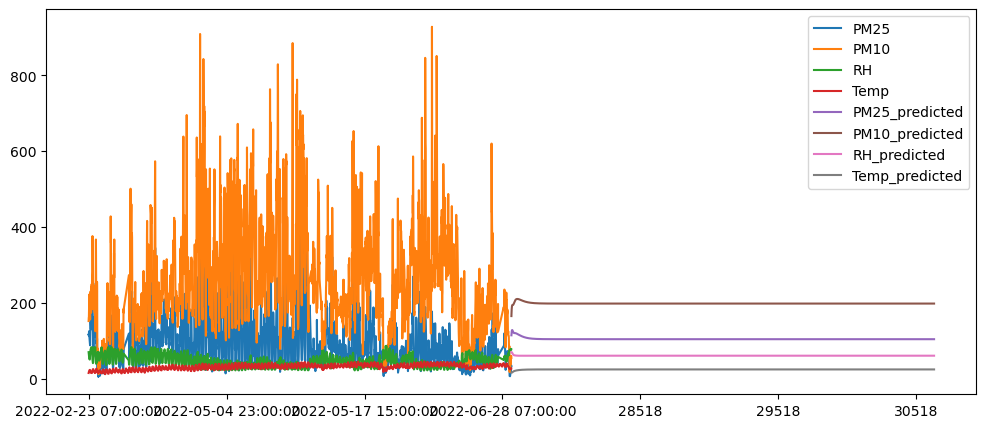

In [64]:
test_vs_pred.plot(figsize = (12,5))

In [65]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_PM25 = math.sqrt(mean_squared_error(predictions['PM25_predicted'],df_test['PM25']))
print('Mean value of PM25 is ; {}. Root Mean Squared Error is :{}.'.format(mean(df_test['PM25']),rmse_PM25))

rmse_PM10 = math.sqrt(mean_squared_error(predictions['PM10_predicted'],df_test['PM10']))
print('Mean value of PM10 is : {}. Root Mean Squared Error is : {}.'.format(mean(df_test['PM10']),rmse_PM10))

Mean value of PM25 is ; 94.1553083197031. Root Mean Squared Error is :70.03362941517943.
Mean value of PM10 is : 254.9783295269168. Root Mean Squared Error is : 148.65973710665997.


In [66]:
from sklearn.metrics import mean_absolute_percentage_error
mape21 = mean_absolute_percentage_error(df_test, predictions)
print("Mean Absolute Percentage Error (MAE):", mape21)

Mean Absolute Percentage Error (MAE): 0.5792555378135585


## Try to Make Equation for PM25 only

In [67]:
df_coeff = pd.DataFrame([results.params['PM25'],results.pvalues['PM25']]).T

In [68]:
df_coeff

,PM25,PM25
const,12.136610,7.628012e-45
L1.PM25,1.341893,0.000000e+00
L1.PM10,0.006245,1.123676e-01
L1.RH,0.436358,1.384010e-55
L1.Temp,-0.987253,1.588695e-15
L2.PM25,-0.519614,0.000000e+00
L2.PM10,0.008561,1.226191e-01
L2.RH,-0.110637,2.060908e-02
L2.Temp,-0.113502,5.608431e-01
L3.PM25,0.143452,3.365113e-29


In [69]:
df_coeff.columns = ['coeff','pval']

In [70]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval'] < 0.05,1, 0)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [71]:
df_coeff['valid']=np.where(df_coeff['pval'] < 0.05,1, 0)

In [72]:
df_coeff

,coeff,pval,valid
const,12.136610,7.628012e-45,1
L1.PM25,1.341893,0.000000e+00,1
L1.PM10,0.006245,1.123676e-01,0
L1.RH,0.436358,1.384010e-55,1
L1.Temp,-0.987253,1.588695e-15,1
L2.PM25,-0.519614,0.000000e+00,1
L2.PM10,0.008561,1.226191e-01,0
L2.RH,-0.110637,2.060908e-02,1
L2.Temp,-0.113502,5.608431e-01,0
L3.PM25,0.143452,3.365113e-29,1


In [73]:
#coeff_arr=np.multiply(df_coeff['coeff'], df_coeff['valid'])[1:].values
coeff_arr=df_coeff['coeff'][1:].values

In [74]:
coeff_arr.shape

(16,)

In [75]:
coeff_arr

array([ 1.34189251,  0.00624476,  0.43635766, -0.98725291, -0.51961386,
        0.00856127, -0.11063702, -0.11350203,  0.1434525 , -0.01168097,
       -0.03009929,  0.52108478, -0.0164366 ,  0.00302035, -0.3153287 ,
        0.29711125])

In [76]:
df_train[-lag:]

,PM25,PM10,RH,Temp
Date,,,,
2022-02-23 03:00:00,108.0,162.0,63.15,18.0
2022-02-23 04:00:00,110.0,154.0,65.85,17.0
2022-02-23 05:00:00,111.0,150.0,67.30,16.0
2022-02-23 06:00:00,110.0,154.0,69.00,16.0


In [77]:
in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [78]:
in_arr.shape

(1, 16)

In [79]:
in_arr

array([[110.  , 154.  ,  69.  ,  16.  , 111.  , 150.  ,  67.3 ,  16.  ,
        110.  , 154.  ,  65.85,  17.  , 108.  , 162.  ,  63.15,  18.  ]])

In [80]:
np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

array([114.37070649])

# VARMAX model

In [88]:
var_model = VARMAX(df_train,order= (4,2), enforce_stationarity = True)
fitted_model = var_model.fit(disp = False)
print(fitted_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:     ['PM25', 'PM10', 'RH', 'Temp']   No. Observations:                27583
Model:                                 VARMA(4,2)   Log Likelihood             -374900.459
                                      + intercept   AIC                         750020.919
Date:                            Tue, 23 May 2023   BIC                         750925.664
Time:                                    19:10:52   HQIC                        750312.382
Sample:                                         0                                         
                                          - 27583                                         
Covariance Type:                              opg                                         
Ljung-Box (L1) (Q):     0.01, 0.01, 0.01, 0.01   Jarque-Bera (JB):   358035.62, 3431858.72, 3947481.46, 115340.29
Prob(Q):                0.93, 0.91, 0.93, 0.94   Prob(JB):         

In [86]:
max_ma_lags = 10

best_model = None
best_aic = 2000
best_bic = 2000

In [83]:
best_aic

750015.4025282827

In [85]:
best_bic

inf

In [89]:


for ma_lags in range(1, max_ma_lags + 1):
    print("aaa")
    model = VARMAX(df_train, order=(4, ma_lags),enforce_stationarity=True)
    fitted_model = model.fit(disp=False)
    model_aic = fitted_model.aic
    model_bic = fitted_model.bic
    if model_aic < best_aic and model_bic < best_bic:
        best_model = fitted_model
        best_aic = model_aic
        best_bic = model_bic


print(best_model.summary())

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


AttributeError: 'NoneType' object has no attribute 'summary'

In [90]:
best_aic

2000

In [91]:
best_bic

2000